In [3]:
import os

# data frame manipulation
import numpy as np
import pandas as pd
from collections import defaultdict

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import scipy as sp
from scipy import stats
import statsmodels

# models
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [4]:
os.chdir('C:/Users/jsbae/410project/data')
df = pd.DataFrame(pd.read_csv('Life Expectancy Data.csv'))

In [6]:
df.describe()
# this lists the percentage of null values that make up each column
# df.isnull().sum() * 100 / df.isnull().count()
# df.count()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
def clean_data(df):
    df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                       "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                      "Measles ":"Measles", "under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                      " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                       "Total expenditure":"Tot_Exp"},inplace=True)
    df = df.fillna(df.median())
    # without status and country name
    new_df = df.drop(columns=['Country', 'Status'])
    return new_df

In [7]:
# this separates into individual dataframes for each country
df_names = dict()
for k, v in df.groupby('Country'):
    print(k)
    df_names[k] = v

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Côte d'Ivoire
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Lao People's Democratic Republic
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
L

In [82]:
# TODO: Figure out how to only erase null values that dont eliminate the entire row
# Interpolate?? or drop altogether? 
# interpolate (1987 rows), dropna (16__)
"""
country_list = df.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']
for country in country_list:
    df.loc[df['Country'] == country, fill_list] = df.loc[df['Country'] == country, fill_list].interpolate()
"""

In [100]:
def pairplots(df):
    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['Adult_Mortality', 'Infant_Deaths', 'Population', 'Schooling'])
    plt.savefig('scaled_all_demo.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['HepatitisB', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS'])
    plt.savefig('scaled_all_vaccine.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['GDP', 'Tot_Exp', 'Income_Comp_Of_Resources', 'Percentage_Exp'])
    plt.savefig('scaled_all_economic.png')

    sns.pairplot(data=df,
                 y_vars=['Life_Expectancy'],
                 x_vars=['Alcohol', 'thinness_1to19_years', 'thinness_5to9_years', 'Under_Five_Deaths', 'BMI'])
    plt.savefig('scaled_all_other.png')

In [16]:
new_df = df.drop(columns=['Country', 'Status'])
names = new_df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
new_df.describe()

# It seems because of the large difference in scales and units, standardizing is a better transformation for this data set.

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [20]:
## lets normalize the data to get better correlation!

norm_df = pd.DataFrame()

# new_df = df.drop(columns=['Country', 'Status'])
# print(np.array(new_df['Alcohol']).flatten())

for column in new_df.columns:
    x_array = np.array(new_df[column]).flatten()
    normalized = preprocessing.normalize([x_array])
    norm_df[column] = normalized.flatten()

In [22]:
#new_df.describe()
norm_df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.018449,0.018278,0.014737,0.004592,0.013971,0.006424,0.017780,0.003810,0.016373,0.004676,0.017753,0.017099,0.017733,0.005988,0.008215,3.433457e-03,0.013632,0.013548,0.017544,0.017803
std,0.000042,0.002510,0.011101,0.017871,0.012051,0.017298,0.004925,0.018055,0.008504,0.017850,0.005021,0.006929,0.005091,0.017453,0.016522,1.812983e-02,0.012433,0.012525,0.005709,0.004840
min,0.018380,0.009583,0.000089,0.000000,0.000031,0.000000,0.000214,0.000000,0.000427,0.000000,0.000645,0.001068,0.000430,0.000344,0.000002,1.141034e-08,0.000283,0.000279,0.000000,0.000000
25%,0.018417,0.016684,0.006620,0.000000,0.003357,0.000041,0.017561,0.000000,0.008276,0.000000,0.016761,0.012613,0.016787,0.000344,0.000721,1.405879e-04,0.004524,0.004467,0.014034,0.015268
50%,0.018453,0.019034,0.012883,0.000455,0.011538,0.000565,0.019702,0.000027,0.018557,0.000445,0.019984,0.016611,0.020016,0.000344,0.002196,4.653212e-04,0.009330,0.009214,0.018842,0.018233
75%,0.018490,0.019958,0.020308,0.003334,0.022707,0.003842,0.020559,0.000567,0.023931,0.003115,0.020843,0.021157,0.020877,0.002750,0.005939,1.538507e-03,0.020073,0.020103,0.021486,0.020901
max,0.018518,0.023495,0.064682,0.272784,0.054909,0.169501,0.021202,0.334069,0.037241,0.278125,0.021273,0.050799,0.021307,0.173921,0.148079,4.342170e-01,0.078313,0.079855,0.026384,0.030685


In [23]:
"""
From the graphs, I notice a few variables that stand out:
Negatively correlated: Infant deaths, HIV, thinness (both), under five deaths
Positively correlated: Schooling, GDP(?), income composition of resources, BMI
"""

'\nFrom the graphs, I notice a few variables that stand out:\nNegatively correlated: Infant deaths, HIV, thinness (both), under five deaths\nPositively correlated: Schooling, GDP(?), income composition of resources, BMI\n'

In [25]:
# use pearson's r to get correlation
# scipy.stats.pearsonr(x, y)


# spearman doesn't assume normal dist
def compute_spearman(df):
    correlation_coeff = list()
    for variable in df.columns:
        _, p_val = sp.stats.spearmanr(df[variable], df['Life_Expectancy'])
        correlation_coeff.append([variable, p_val])
    return sorted(correlation_coeff, key=lambda x: x[1])


In [102]:
# they equal each other
spearman_scaled = compute_spearman(scaled_df)
spearman_norm = compute_spearman(norm_df)

for i in range(len(spearman_scaled)):
    print(spearman_scaled[i])

['Life_Expectancy', 0.0]
['Adult_Mortality', 0.0]
['HIV/AIDS', 0.0]
['Income_Comp_Of_Resources', 0.0]
['Schooling', 0.0]
['Under_Five_Deaths', 2.6695542748012934e-307]
['thinness_5to9_years', 7.032608379546386e-303]
['thinness_1to19_years', 1.781172273000317e-290]
['Infant_Deaths', 1.5653857025847495e-285]
['GDP', 6.797666125765049e-284]
['BMI', 3.402487976762176e-264]
['Diphtheria', 8.833823641765406e-223]
['Polio', 8.599712546571468e-214]
['Percentage_Exp', 9.272480904123952e-131]
['Alcohol', 9.470443682045878e-129]
['HepatitisB', 3.1005806341938203e-61]
['Tot_Exp', 2.3710848234949152e-55]
['Measles', 2.9898347194712915e-54]
['Year', 1.3530297332773523e-17]
['Population', 9.73076421724408e-05]


C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.04203e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18071.924220566965, tolerance: 21.028883938723403
  positive)
C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20166.024096218247, tolerance: 21.028883938723403
  positive)
C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.40533e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19787.159261706227, tolerance: 21.028883938723403
  positive)
C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1423.308836484739, tolerance: 16.684149087234047
  tol, rng, random, positive)
C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3810.099490752131, tolerance: 16.982759242553193
  tol, rng, random, positive)
C:\Users\jsbae\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

0.5
0.1
0.1
results
mean absolute 3.1111055279045843
mean squared 17.085545405530617
room mean squared 4.133466511964336
accuracy 0.818117245312215
results
mean absolute 3.216550098625195
mean squared 18.000553424351434
room mean squared 4.242705908303265
accuracy 0.8083766034377875
results
mean absolute 3.202446935428355
mean squared 17.855308796874937
room mean squared 4.2255542591327515
accuracy 0.8099227930572582
results
mean absolute 3.1108259805824843
mean squared 17.083500182570248
room mean squared 4.133219106528258
accuracy 0.8181390175633871
results
mean absolute 3.1762941879653734
mean squared 17.637598061685043
room mean squared 4.1997140452279655
accuracy 0.8122404146081994
results
mean absolute 3.16592745921977
mean squared 17.536933551067087
room mean squared 4.187712209675718
accuracy 0.8133120302959587


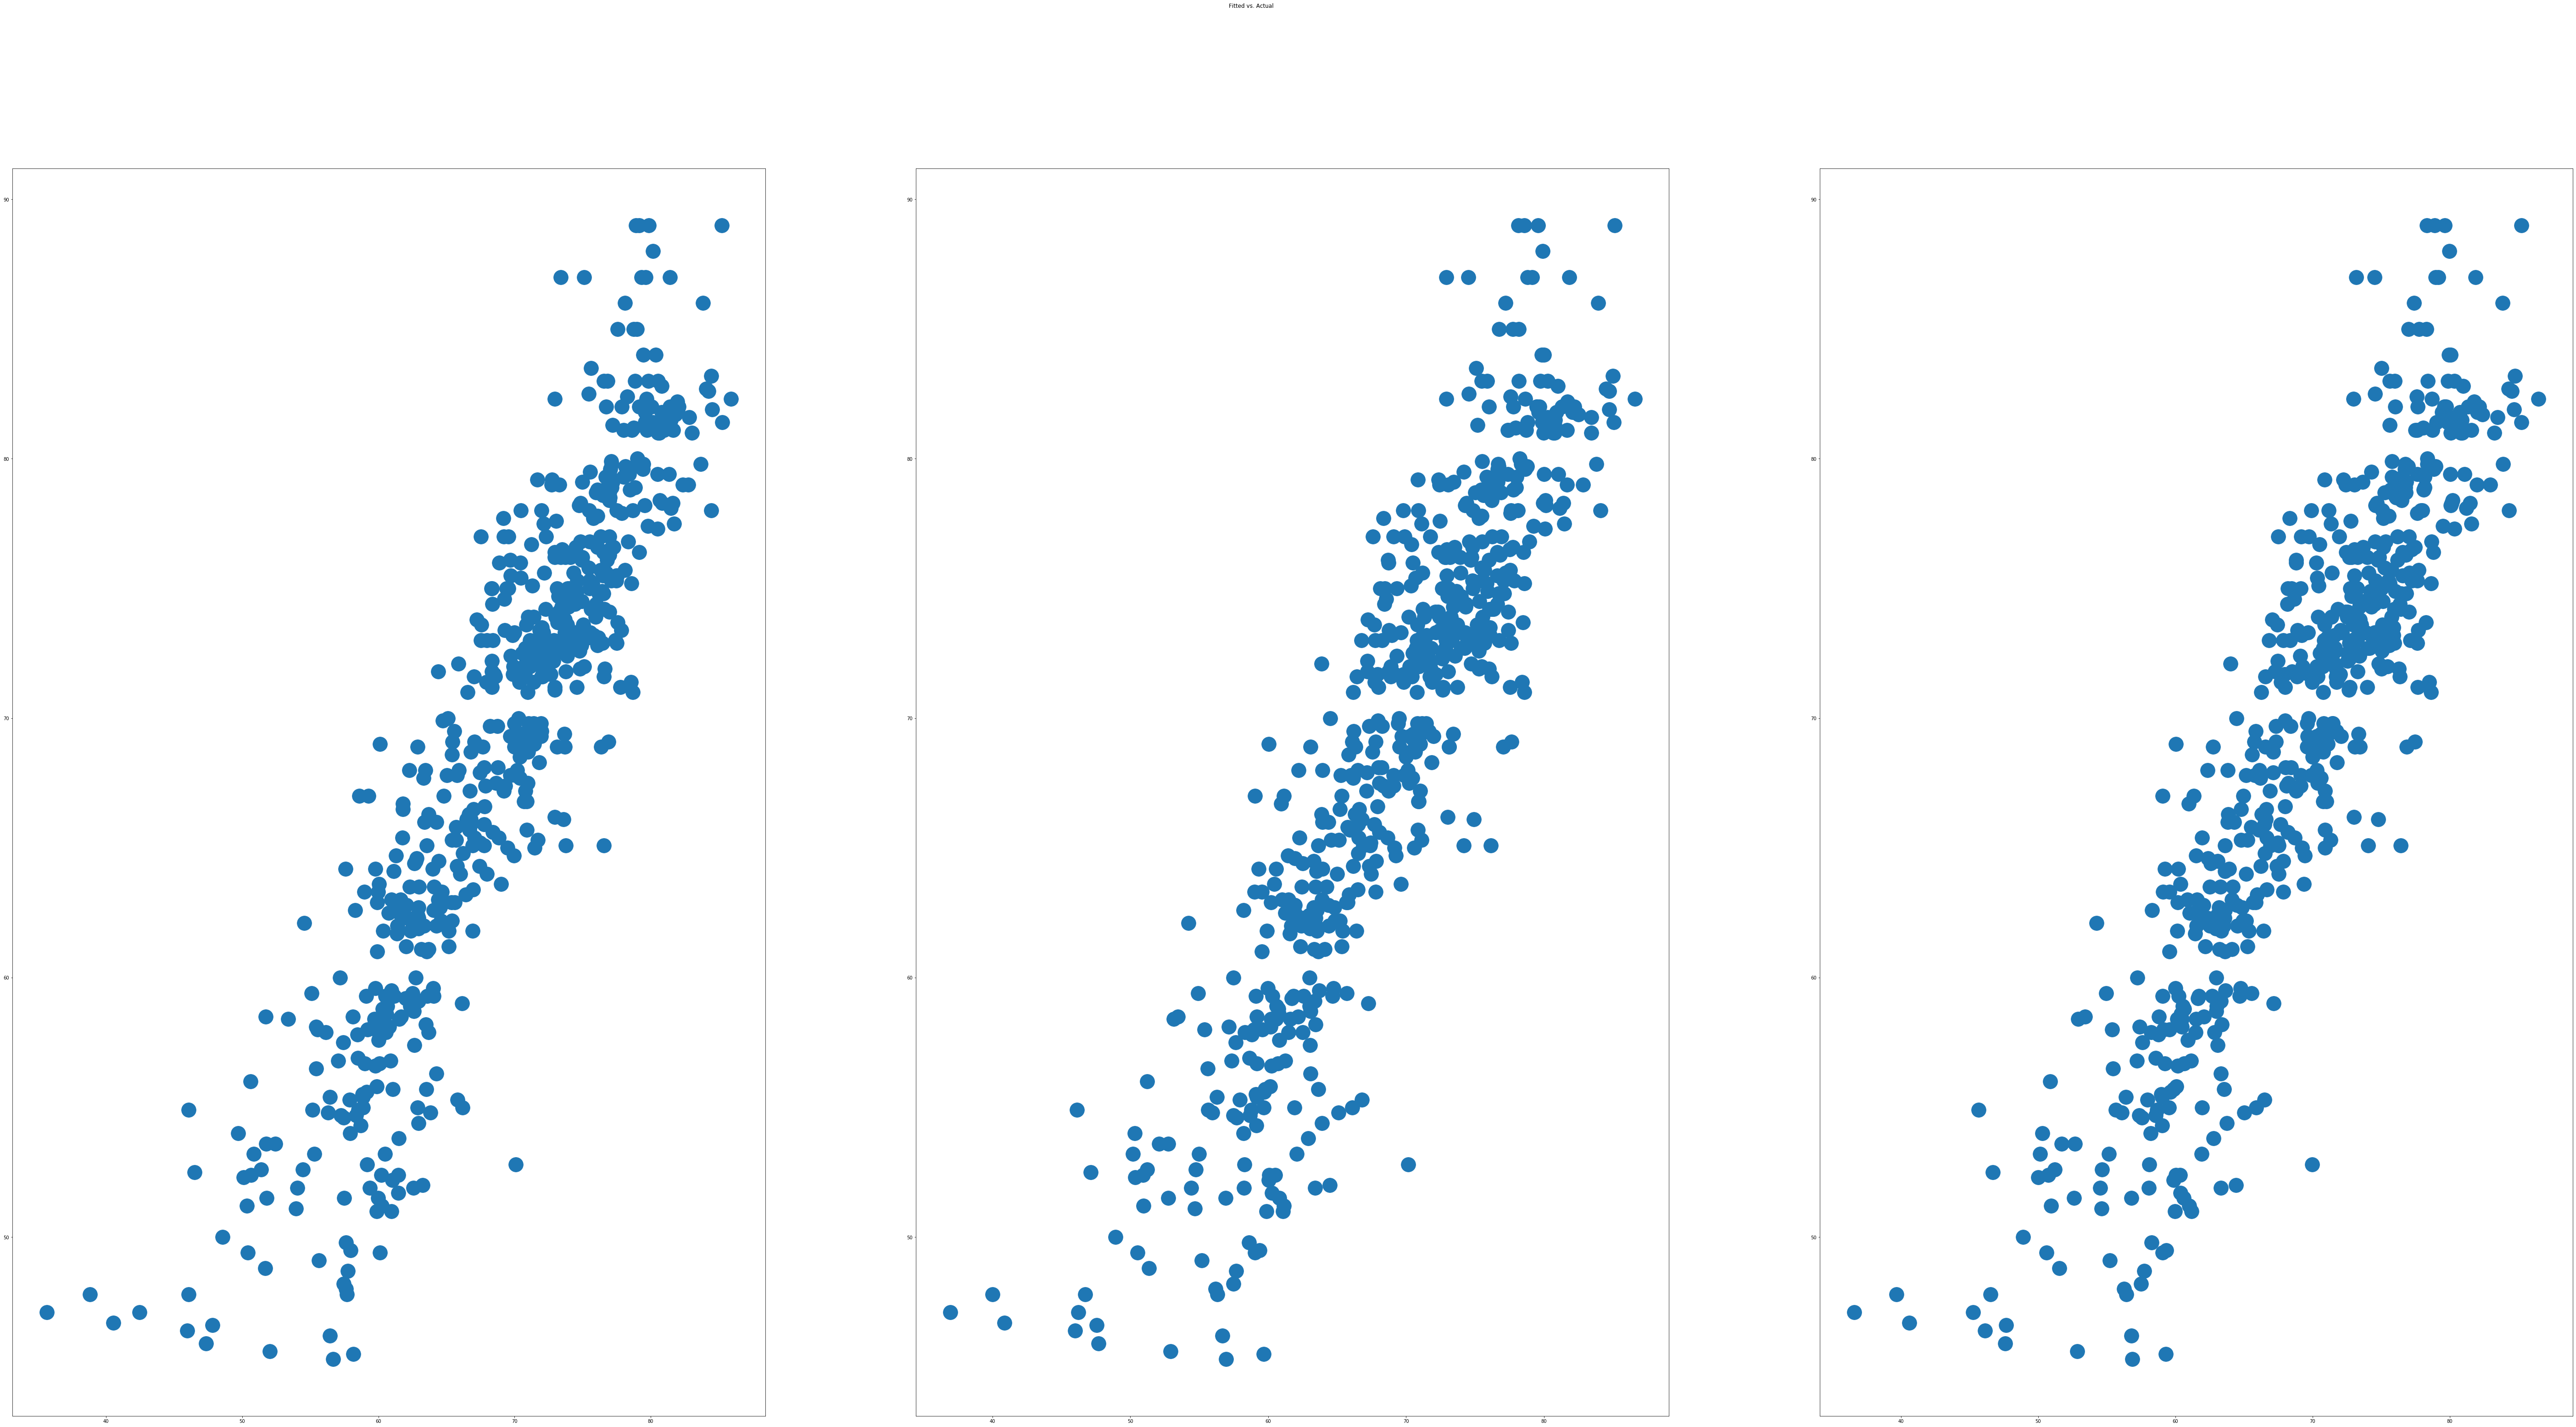

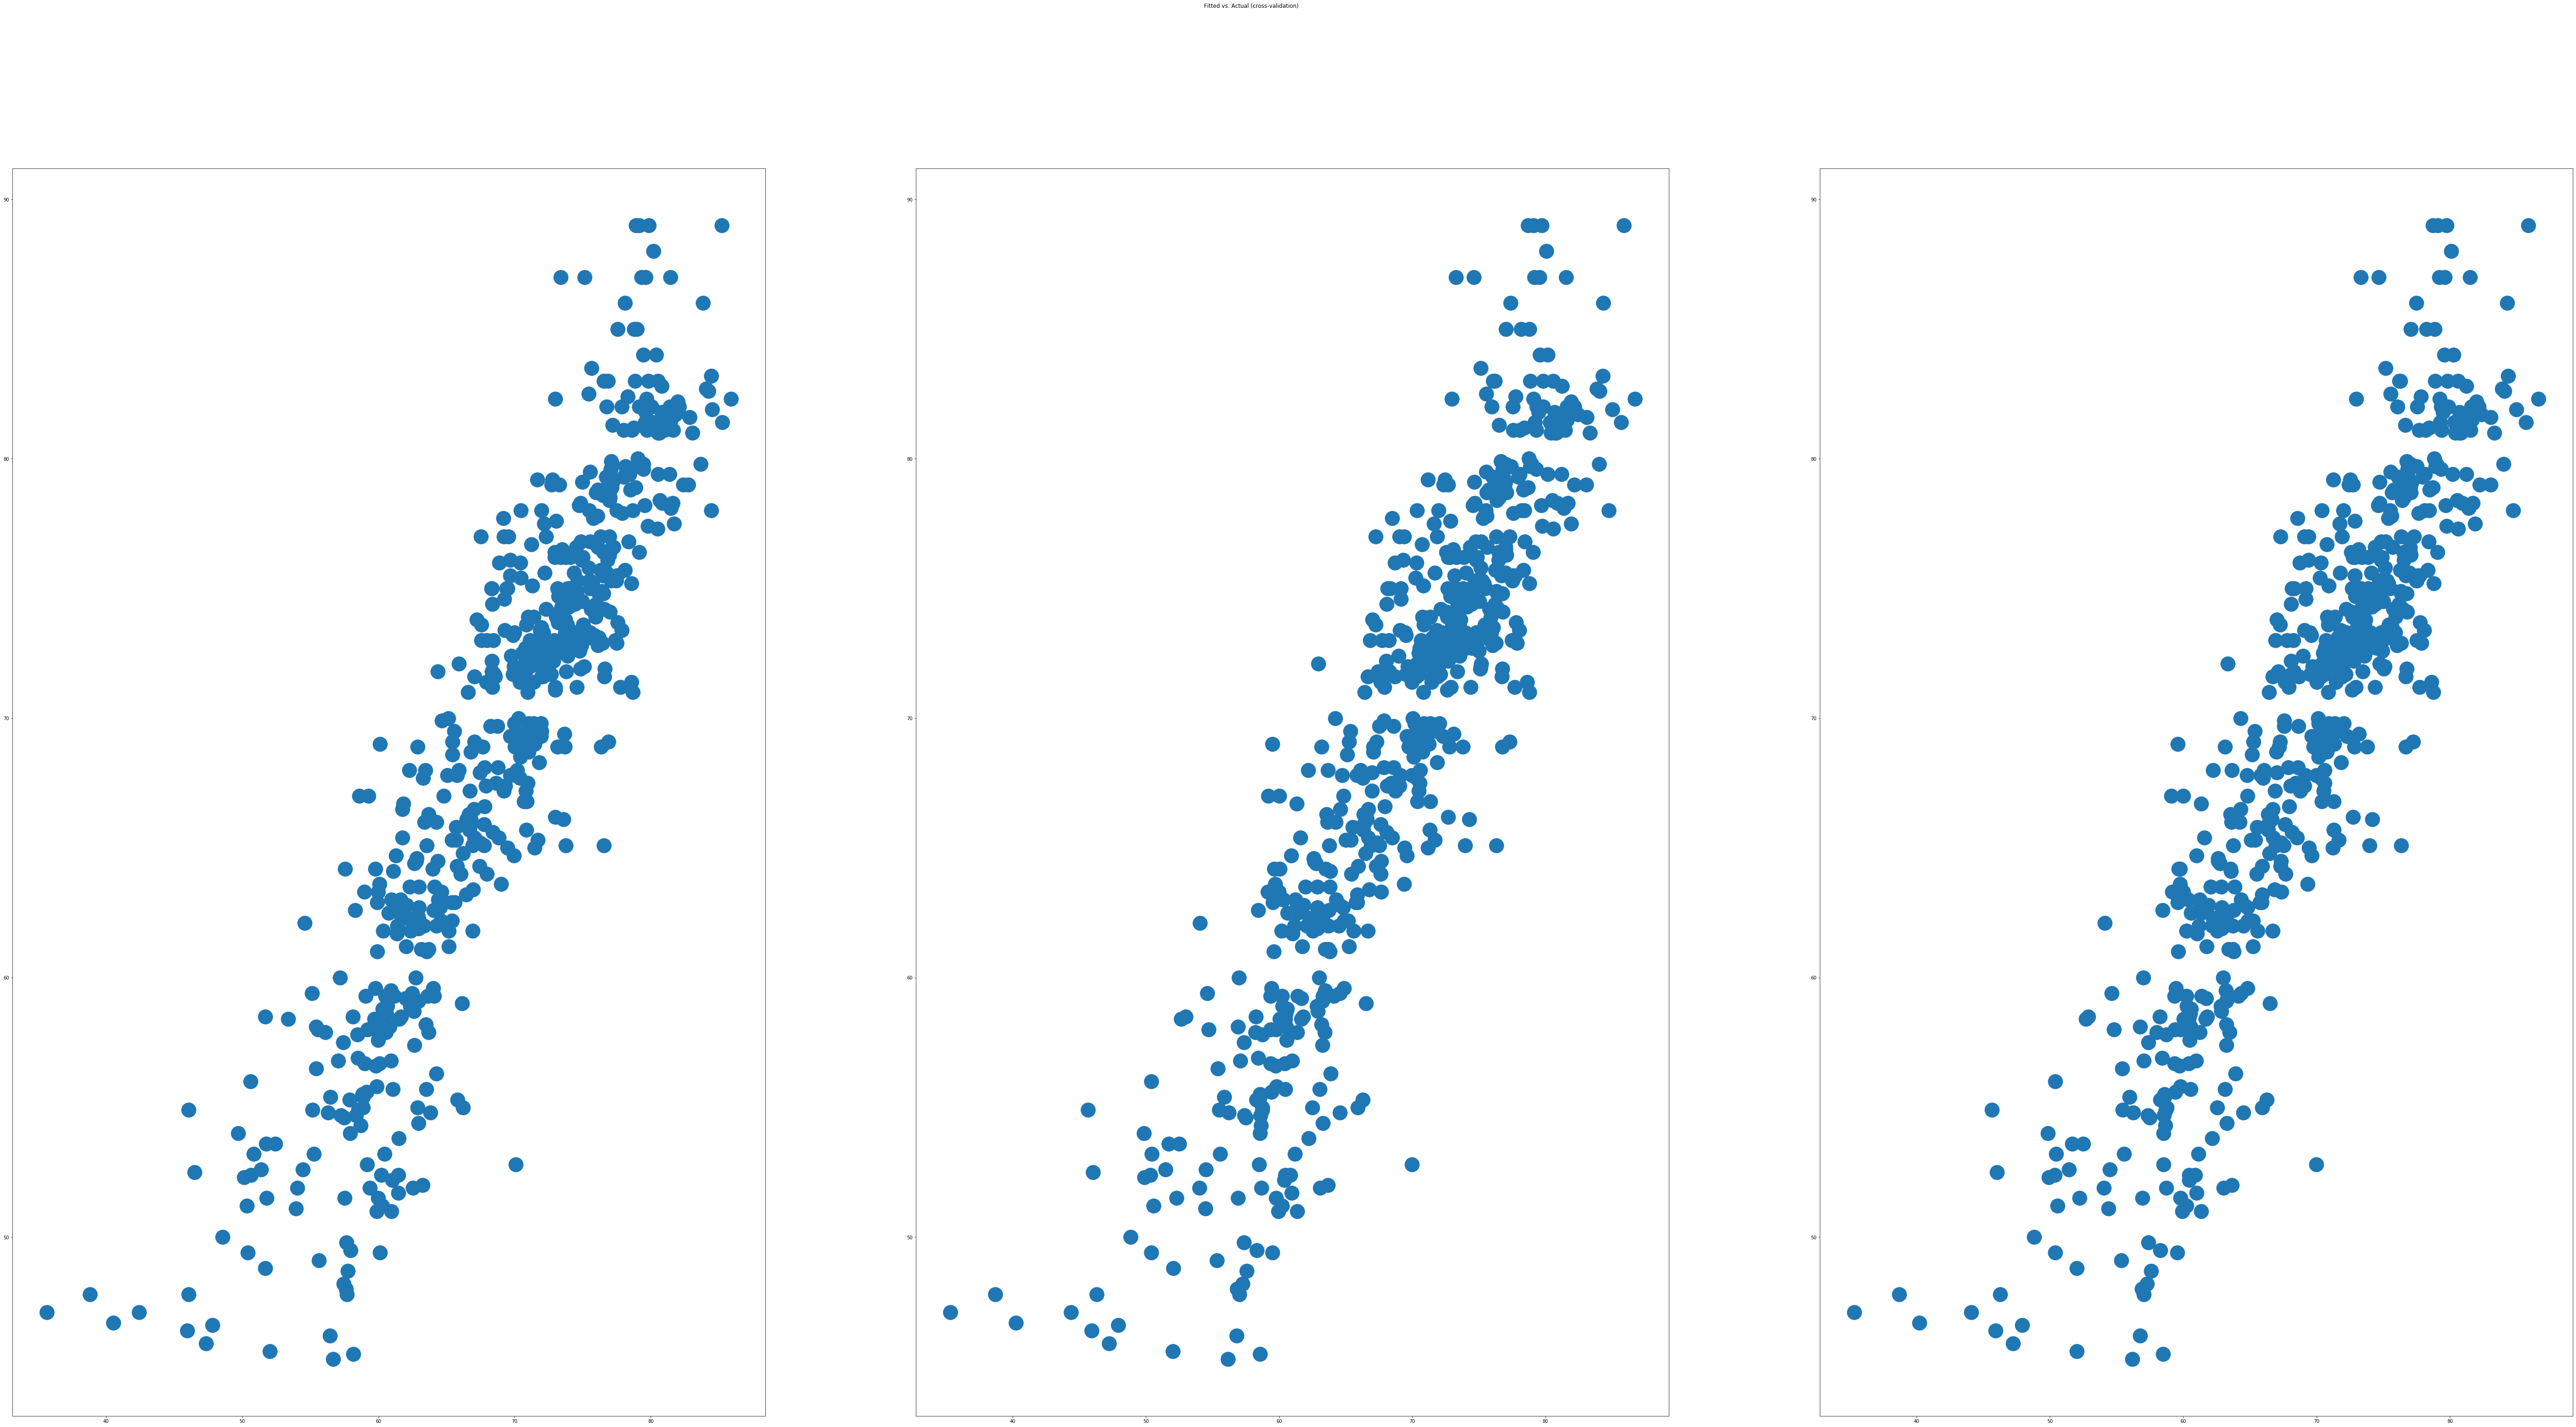

In [132]:
newer_df = new_df.drop(columns=['Life_Expectancy'])

X_train, X_test, y_train, y_test = train_test_split(newer_df, new_df['Life_Expectancy'], train_size=0.8)

# ridge regression has the worst performance of all? (according to cross-validation)
ridge_model = Ridge(alpha=1.0)
# lasso says nothing is significant (all weights are 0)
lasso_model = Lasso(alpha=1.0)
# elastic says only adult_mort, Income_Comp_Of_Resources, Schooling are important (which seems very likely)
elastic_model = ElasticNet(alpha=1.0)

fitted_ridge = ridge_model.fit(X_train, y_train)
fitted_lasso = lasso_model.fit(X_train, y_train)
fitted_elastic = elastic_model.fit(X_train, y_train)

results_ridge = fitted_ridge.predict(X_test)
results_lasso = fitted_lasso.predict(X_test)
results_elastic = fitted_elastic.predict(X_test)

# cross-validation fitted models
fitted_cross_ridge = RidgeCV(cv=5, alphas=[0.1, 0.5, 1.0, 5.0, 10.0]).fit(X_train, y_train)
fitted_cross_lasso = LassoCV(cv=5, alphas=[0.1, 0.5, 1.0, 5.0, 10.0]).fit(X_train, y_train)
fitted_cross_elastic = ElasticNetCV(cv=5, alphas=[0.1, 0.5, 1.0, 5.0, 10.0]).fit(X_train, y_train)

print(fitted_cross_ridge.alpha_)
print(fitted_cross_lasso.alpha_)
print(fitted_cross_elastic.alpha_)

cross_results_ridge = fitted_cross_ridge.predict(X_test)
cross_results_lasso = fitted_cross_lasso.predict(X_test)
cross_results_elastic = fitted_cross_elastic.predict(X_test)


def error_metrics(output):
    print('results')
    print("mean absolute", metrics.mean_absolute_error(y_test, output))
    print("mean squared", metrics.mean_squared_error(y_test, output))
    print("room mean squared", np.sqrt(metrics.mean_squared_error(y_test, output)))
    print("accuracy", metrics.r2_score(y_test, output))

error_metrics(results_ridge)
error_metrics(results_lasso)
error_metrics(results_elastic)

error_metrics(cross_results_ridge)
error_metrics(cross_results_lasso)
error_metrics(cross_results_elastic)


# fitted vs. actual (seems pretty linear)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
fig.suptitle('Fitted vs. Actual')
ax1.scatter(results_ridge, y_test, s=1000) 
ax2.scatter(results_lasso, y_test, s=1000) 
ax3.scatter(results_elastic, y_test, s=1000) 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
fig.suptitle('Fitted vs. Actual (cross-validation)')
ax1.scatter(cross_results_ridge, y_test, s=1000) 
ax2.scatter(cross_results_lasso, y_test, s=1000) 
ax3.scatter(cross_results_elastic, y_test, s=1000) 

In [ ]:
### residuals vs. fitted
ridge_residuals = y_test - results_ridge
lasso_residuals = y_test - results_lasso
elastic_residuals = y_test - results_elastic

cross_ridge_residuals = y_test - cross_results_ridge
cross_lasso_residuals = y_test - cross_results_lasso
cross_elastic_residuals = y_test - cross_results_elastic

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
#fig.suptitle('Residuals subplots')
#ax1.scatter(results_ridge, ridge_residuals, s=1000) 
#ax2.scatter(results_lasso, lasso_residuals, s=1000) 
#ax3.scatter(results_elastic, elastic_residuals, s=1000) 

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(100, 50))
#fig.suptitle('Residuals subplots (cross-validation)')
#ax1.scatter(cross_results_ridge, cross_ridge_residuals, s=1000) 
#ax2.scatter(cross_results_lasso, cross_lasso_residuals, s=1000) 
#ax3.scatter(cross_results_elastic, cross_elastic_residuals, s=1000) 

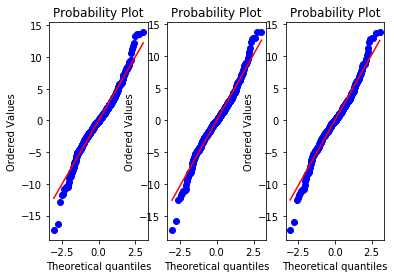

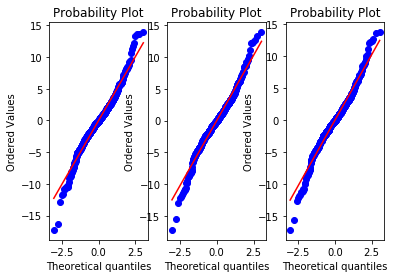

In [127]:
fig.suptitle('QQ-plots of residuals')
ax1 = plt.subplot(131)
stats.probplot(ridge_residuals, plot=plt)
ax2 = plt.subplot(132)
stats.probplot(lasso_residuals, plot=plt)
ax3 = plt.subplot(133)
stats.probplot(elastic_residuals, plot=plt)
plt.show()


fig.suptitle('QQ-plots of residuals (cross-validation)')
ax1 = plt.subplot(131)
stats.probplot(cross_ridge_residuals, plot=plt)
ax2 = plt.subplot(132)
stats.probplot(cross_lasso_residuals, plot=plt)
ax3 = plt.subplot(133)
stats.probplot(cross_elastic_residuals, plot=plt)
plt.show()